# Global Shark Attacks Dataset:
## This is a table of shark attack incidents compiled by the Global Shark Attack File.
https://www.kaggle.com/datasets/alinedebenath/global-shark-attacks

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

dataset = pd.read_csv('GSAF5.csv', header = 0, encoding="latin-1")
dataset.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


# **Comprensión de los datos**

In [2]:
dataset.shape

(5992, 24)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             5992 non-null   object
 1   Date                    5992 non-null   object
 2   Year                    5992 non-null   int64 
 3   Type                    5992 non-null   object
 4   Country                 5949 non-null   object
 5   Area                    5590 non-null   object
 6   Location                5496 non-null   object
 7   Activity                5465 non-null   object
 8   Name                    5792 non-null   object
 9   Sex                     5425 non-null   object
 10  Age                     3311 non-null   object
 11  Injury                  5965 non-null   object
 12  Fatal (Y/N)             5973 non-null   object
 13  Time                    2779 non-null   object
 14  Species                 3058 non-null   object
 15  Inve

In [4]:
# Por de pronto vamos a eliminar atributos que a priori no nos van a servir
dataset = dataset.drop(["Name", "Investigator or Source", "pdf", "href formula", "href", "original order"], axis=1)

In [5]:
# Vamos a visualizar las columnas con valores nulos
null_cols = dataset.isnull().sum()
null_cols[null_cols > 0]

Country          43
Area            402
Location        496
Activity        527
Sex             567
Age            2681
Injury           27
Fatal (Y/N)      19
Time           3213
Species        2934
Unnamed: 22    5991
Unnamed: 23    5990
dtype: int64

<Axes: >

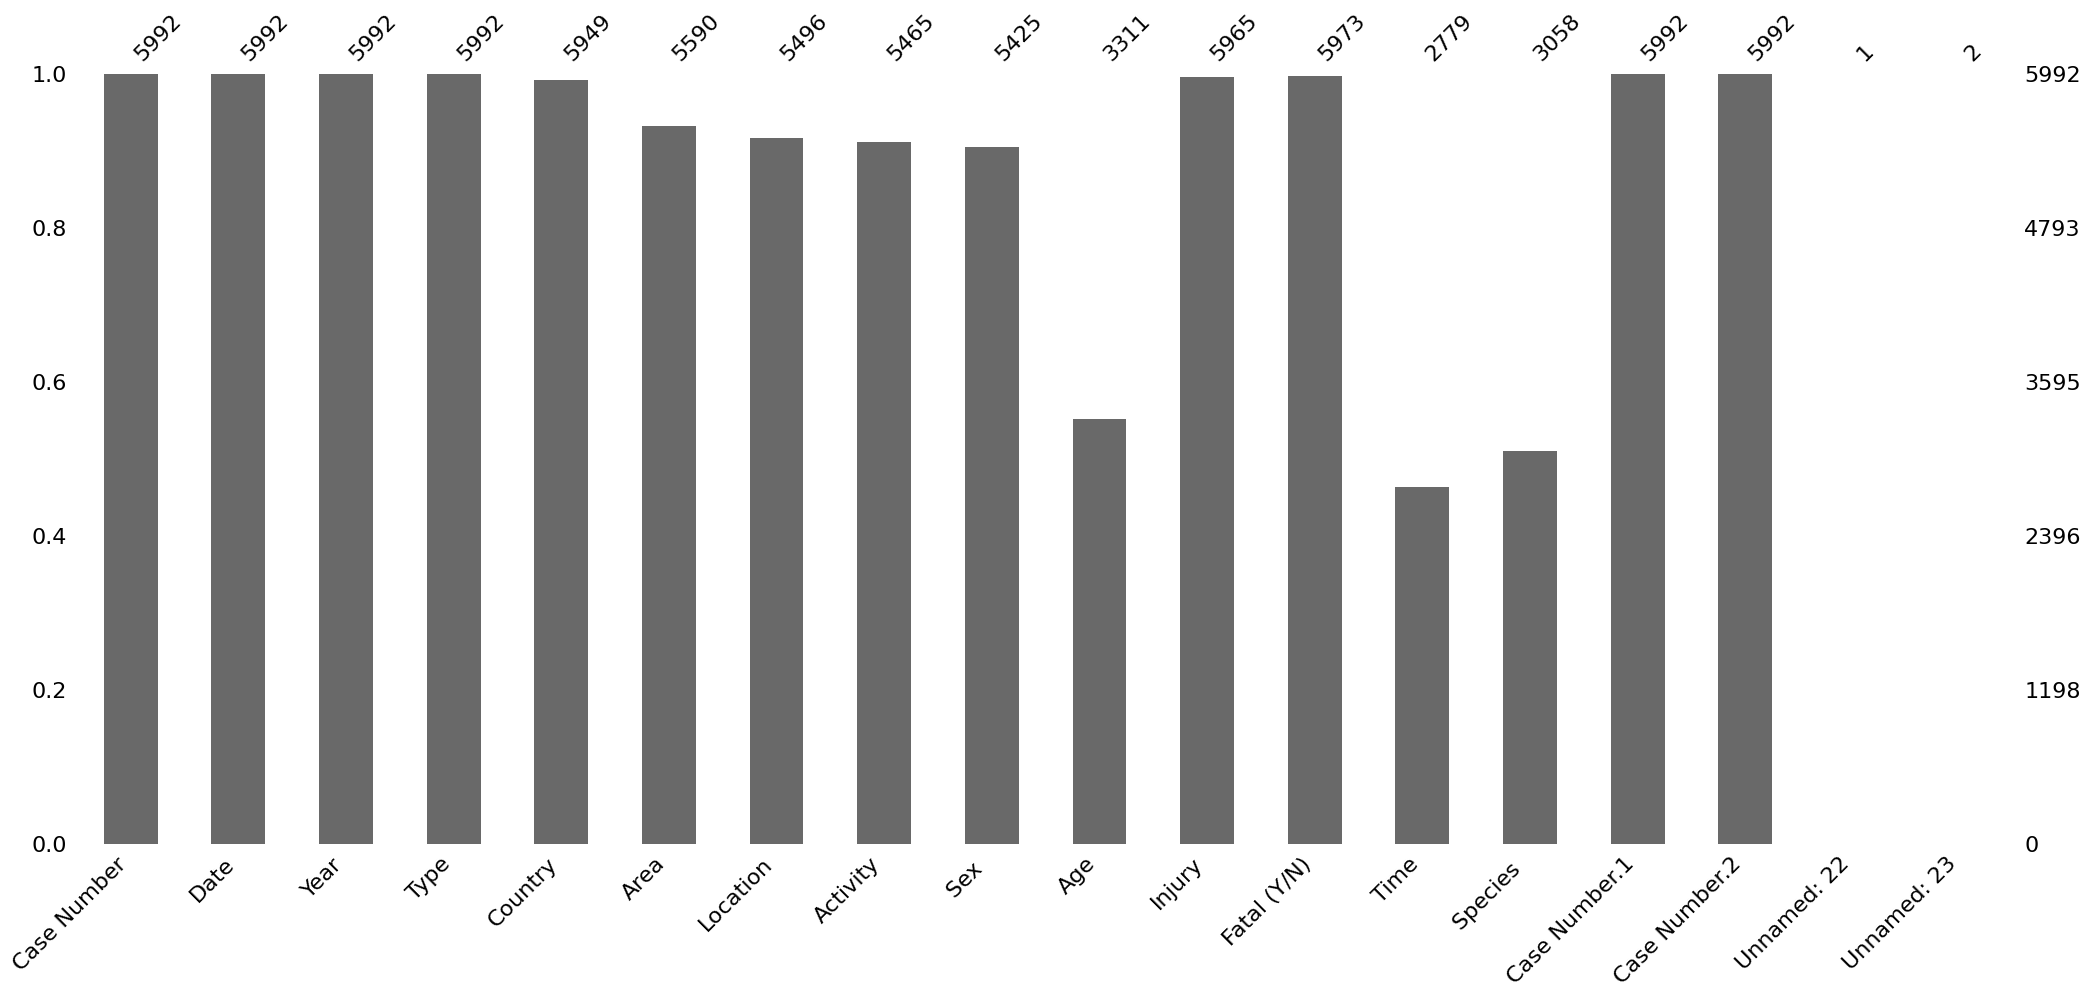

In [8]:
import missingno as msno

msno.bar(dataset)

In [9]:
# Podemos empezar viendo si hay duplicados
dataset.duplicated().sum()                     

0

# **Limpieza de datos**

## **Unnamed: 22 y Unnamed: 23**

In [10]:
# Directamente eliminamos los atributos por la gran cantidad de valores nulos que contiene
dataset = dataset.drop(["Unnamed: 22", "Unnamed: 23"], axis=1)


## **Time**

In [11]:
# ¿Cuántos valores nulos tiene?
nan_per=dataset['Time'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

53.62  % valores nulos


In [12]:
# Eliminamos el atributo
dataset = dataset.drop(["Time"], axis=1)

## **Case Number, Case Number.1 y Case Number.2"**

In [13]:
dataset['Case Number.1'].isin(dataset['Case Number']).value_counts()

Case Number.1
True     5980
False      12
Name: count, dtype: int64

In [14]:
dataset['Case Number.2'].isin(dataset['Case Number']).value_counts()

Case Number.2
True     5990
False       2
Name: count, dtype: int64

In [15]:
# Como básicamente contienen lo mismo nos quedmos con Case Number
dataset = dataset.drop(["Case Number.1", "Case Number.2"], axis=1)

## **Case Number y Date**

In [16]:
dataset["Date"]

0         18-Sep-16
1         18-Sep-16
2         18-Sep-16
3         17-Sep-16
4         16-Sep-16
           ...     
5987    Before 1903
5988    Before 1903
5989      1900-1905
5990      1883-1889
5991      1845-1853
Name: Date, Length: 5992, dtype: object

In [17]:
# Muchos formatos diferentes, veremos que pasa con Case Number, que también contiene la fecha
# Podemos sacar el mes y el día, que el año ya lo tenemos, de Case Number
# Hay que tener en cuenta que cuando no se sabe la fecha aparece ND

dataset['Month']= dataset['Case Number'].apply(lambda x: x[5:7] if ((x[0:2]!='ND') & (x[0:2]!='nd') & (x[0:2]!='0.')) else 0)
dataset['Day']= dataset['Case Number'].apply(lambda x: x[8:10] if ((x[0:2]!='ND') & (x[0:2]!='nd') & (x[0:2]!='0.')) else 0)

dataset.Month = dataset.Month.astype('int64')
dataset.Day = dataset.Day.astype('int64')

In [18]:
dataset[['Case Number', 'Year', 'Month', 'Day']]

,Case Number,Year,Month,Day
0,2016.09.18.c,2016,9,18
1,2016.09.18.b,2016,9,18
2,2016.09.18.a,2016,9,18
3,2016.09.17,2016,9,17
4,2016.09.15,2016,9,15
...,...,...,...,...
5987,ND.0005,0,0,0
5988,ND.0004,0,0,0
5989,ND.0003,0,0,0
5990,ND.0002,0,0,0


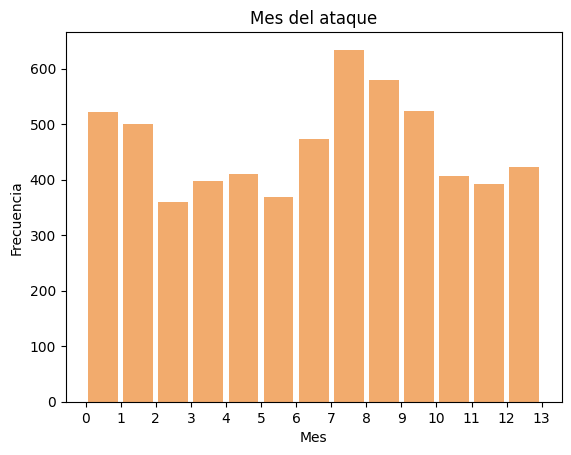

In [19]:
import matplotlib.pyplot as plot

intervalos = range(min(dataset.Month), max(dataset.Month) + 2) #calculamos los extremos de los intervalos

plot.hist(x=dataset.Month, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.title('Mes del ataque')
plot.xlabel('Mes')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

plot.show()

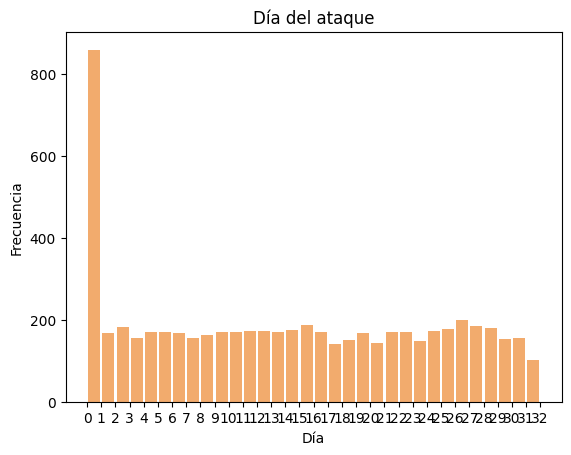

In [20]:
intervalos = range(min(dataset.Day), max(dataset.Day) + 2) #calculamos los extremos de los intervalos

plot.hist(x=dataset.Day, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.title('Día del ataque')
plot.xlabel('Día')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

plot.show()

In [21]:
# Con lo que podemos eliminar Case Number y Date

dataset = dataset.drop(["Case Number", "Date"], axis=1)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         5992 non-null   int64 
 1   Type         5992 non-null   object
 2   Country      5949 non-null   object
 3   Area         5590 non-null   object
 4   Location     5496 non-null   object
 5   Activity     5465 non-null   object
 6   Sex          5425 non-null   object
 7   Age          3311 non-null   object
 8   Injury       5965 non-null   object
 9   Fatal (Y/N)  5973 non-null   object
 10  Species      3058 non-null   object
 11  Month        5992 non-null   int64 
 12  Day          5992 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 608.7+ KB


## **Year**

In [23]:
dataset['Year'].value_counts()

Year
2015    139
2011    128
2014    125
0       124
2013    122
       ... 
1791      1
1788      1
1787      1
1785      1
1803      1
Name: count, Length: 232, dtype: int64

In [24]:
# Solo estudiaremos los casos producidos desde 1950, que son los más numerosos 
dataset.loc[dataset['Year']>1950].Year.count()

4228

In [25]:
dataset = dataset[dataset['Year'] > 1950]

In [26]:
dataset.Year.max()

2016

In [27]:
# Vamos a agrupar
dataset['Decada'] = pd.cut(dataset.Year, bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], labels=range(1950,2020,10))

In [28]:
dataset['Decada'].value_counts()

Decada
2000    1024
2010     734
1990     627
1960     566
1950     513
1980     437
1970     327
Name: count, dtype: int64

In [29]:
dataset['Decada'] = dataset['Decada'].map({1950: 1, 1960: 2, 1970: 3, 1980: 4, 1990: 5, 2000: 6, 2010:7})

In [30]:
dataset['Decada'].value_counts()

Decada
6    1024
7     734
5     627
2     566
1     513
4     437
3     327
Name: count, dtype: int64

In [31]:
dataset = dataset.drop(["Year"], axis=1)

## **Type**

In [32]:
dataset['Type'].value_counts()

Type
Unprovoked      3163
Provoked         414
Invalid          349
Boat             194
Sea Disaster      93
Boating           15
Name: count, dtype: int64

In [33]:
dataset['Type'] = dataset['Type'].str.strip()
dataset['Type'] = dataset['Type'].str.replace('Boating','Boat')
dataset['Type'] = dataset['Type'].str.replace('Invalid','Unknown')
dataset['Type'].value_counts()

Type
Unprovoked      3163
Provoked         414
Unknown          349
Boat             209
Sea Disaster      93
Name: count, dtype: int64

In [34]:
dataset['Type'] = dataset['Type'].map({'Unprovoked': 1, 'Provoked': 2, 'Unknown': 3, 'Boat': 4, 'Sea Disaster': 5})
dataset['Type'].value_counts()

Type
1    3163
2     414
3     349
4     209
5      93
Name: count, dtype: int64

## **Country**

In [35]:
dataset['Country'].value_counts()

Country
USA                     1771
AUSTRALIA                731
SOUTH AFRICA             450
PAPUA NEW GUINEA         110
BRAZIL                    95
                        ... 
ANGOLA                     1
NAMIBIA                    1
SOUTH CHINA SEA            1
BANGLADESH                 1
NETHERLANDS ANTILLES       1
Name: count, Length: 147, dtype: int64

In [36]:
dataset['Country'].fillna('Unknown', inplace=True)
dataset['Country'] = dataset['Country'].str.strip().str.upper()
dataset['Country'].value_counts()

Country
USA                     1771
AUSTRALIA                731
SOUTH AFRICA             450
PAPUA NEW GUINEA         110
BRAZIL                    95
                        ... 
CAPE VERDE                 1
NAMIBIA                    1
SOUTH CHINA SEA            1
BANGLADESH                 1
NETHERLANDS ANTILLES       1
Name: count, Length: 142, dtype: int64

In [ ]:
# Tenemos muchos países con solo una ocurrencia, los podemos agrupar
# dataset['Country'] = dataset['Country'].map(lambda x: 'OTHERS' if ((dataset['Country'] == x).sum() < 1) else x)
# dataset.loc[dataset['Country']=='UNKNOWN'] = 'OTHERS'

In [38]:
# Vamos a simplificar y solo consideraremos los casos de USA, que son los más numerosos
ds_USA = dataset[dataset['Country']=='USA']
ds_USA.groupby(['Country', 'Area']).count()

Type  Location  Activity  Sex   Age  Injury  \
Country Area                                                                  
USA     Alabama                   11        11        10    10    9      11   
        Alaska                     1         1         1     1    0       1   
        California               253       252       245   236  171     252   
        Connecticut                2         2         2     1    1       2   
        Delaware                   5         5         5     5    4       5   
        Florida                  909       902       861   878  768     906   
        Florida                    1         1         1     1    1       1   
        Georgia                    9         9         9     9    8       9   
        Guam                       1         1         1     1    1       1   
        Hawaii                   223       223       217   208  126     223   
        Illinois                   1         1         1     1    0       1   
        Johnston Atoll             1         0         1     1    1       1   
        Kentucky                   1         1         1     0    0       1   
        Louisiana                  8         7         8     7    5       8   
        Maine                      1         1         1     1    1       1   
        Maryland                   3         3         3     2    2       3   
        Massachusetts              7         7         7     6    6       7   
        Mississippi                3         3         3     3    3       3   
        Missouri                   1         1         1     1    1       1   
        New Jersey                12        12        11    12   10      12   
        New Mexico                 1         1         1     1    1       1   
        New York                   7         7         7     7    6       7   
        North & South Carolina     1         0         1     1    0       1   
        North Carolina            81        80        76    76   69      81   
        North Carolina             1         1         1     1    1       1   
        Oregon                    28        27        28    28   24      28   
        Palmyra Atoll              2         0         2     2    2       2   
        Pennsylvania               1         1         1     1    1       1   
        Puerto Rico               10         7         9     9    6      10   
        Rhode Island               2         1         2     1    1       2   
        South Carolina           110       107        94   106   84     109   
        South Carolina             1         1         1     1    1       1   
        Texas                     52        52        50    51   40      52   
        US Virgin Islands          4         4         4     4    3       4   
        Virginia                  14        14        14    14    8      14   
        Wake Island                1         1         1     1    0       1   
        Washington                 1         1         1     1    0       1   

                                Fatal (Y/N)  Species   Month  Day  Decada  
Country Area                                                               
USA     Alabama                          11         6     11   11      11  
        Alaska                            1         1      1    1       1  
        California                      253       211    253  253     253  
        Connecticut                       2         0      2    2       2  
        Delaware                          5         4      5    5       5  
        Florida                         909       496    909  909     909  
        Florida                           1         1      1    1       1  
        Georgia                           9         3      9    9       9  
        Guam                              1         1      1    1       1  
        Hawaii                          223       151    223  223     223  
        Illinois                      

In [39]:
ds_USA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1771 entries, 0 to 4215
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Type         1771 non-null   object  
 1   Country      1771 non-null   object  
 2   Area         1770 non-null   object  
 3   Location     1748 non-null   object  
 4   Activity     1682 non-null   object  
 5   Sex          1690 non-null   object  
 6   Age          1365 non-null   object  
 7   Injury       1766 non-null   object  
 8   Fatal (Y/N)  1771 non-null   object  
 9   Species      1102 non-null   object  
 10  Month        1771 non-null   object  
 11  Day          1771 non-null   object  
 12  Decada       1771 non-null   category
dtypes: category(1), object(12)
memory usage: 181.9+ KB


In [40]:
# Con lo que podemos eliminar el atributo
ds_USA = ds_USA.drop(["Country"], axis=1)

## **Area y Location**

In [41]:
ds_USA['Area'].isna().sum()

1

In [45]:
# Solo hay un nulo, lo eliminamos
ds_USA.drop(ds_USA[ds_USA['Area'].isna()].index, inplace = True)

In [41]:
ds_USA['Area']=ds_USA['Area'].astype('category').cat.codes

In [42]:
ds_USA['Area'].value_counts()

5     909
2     253
9     223
30    110
23     81
32     52
25     28
34     14
19     12
0      11
28     10
7       9
13      8
21      7
16      7
4       5
33      4
15      3
17      3
26      2
3       2
29      2
24      1
10      1
27      1
6       1
22      1
36      1
1       1
18      1
11      1
31      1
20      1
8       1
12      1
14      1
35      1
Name: Area, dtype: int64

In [43]:
ds_USA['Location'].value_counts()

New Smyrna Beach, Volusia County            157
Daytona Beach, Volusia County                27
Myrtle Beach, Horry County                   17
Ponce Inlet, Volusia County                  17
Melbourne Beach, Brevard County              15
                                           ... 
Bryan Beach, Brazoria County                  1
Gulf Shores Beach, Baldwin County             1
Disney / Vero Beach, Indian River County      1
Pirate's Beach, Galveston Island              1
Kapehu Beach, Laupahoehoe, Hawai'i            1
Name: Location, Length: 1085, dtype: int64

In [44]:
# Eliminamos Location
ds_USA = ds_USA.drop(["Location"], axis=1)

## **Activity**

In [45]:
ds_USA['Activity'].value_counts()

Surfing                           531
Swimming                          212
Wading                             96
Fishing                            57
Standing                           48
                                 ... 
Swimming near pod of whales         1
Body surfing or body boarding       1
Swimming, towing a kayak            1
Splashing / wading                  1
Swept out to sea while fishing      1
Name: Activity, Length: 387, dtype: int64

In [46]:
# Podríamos centrarnos en las actividades más frecuentes, pero por ahora lo vamos a dejar
ds_USA = ds_USA.drop(["Activity"], axis=1)

## **Sex**

In [47]:
# Tenemos que renombrar la columna
ds_USA.rename(columns={'Sex ': 'Sex'}, inplace=True)
ds_USA['Sex'].value_counts()

M      1399
F       288
M         1
lli       1
Name: Sex, dtype: int64

In [48]:
nan_per=ds_USA['Sex'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

1.92  % valores nulos


In [49]:
ds_USA['Sex'] = ds_USA['Sex'].str.strip()
ds_USA.drop(ds_USA[ds_USA['Sex']=='lli'].index, inplace = True)
ds_USA.drop(ds_USA[ds_USA['Sex'].isna()].index, inplace = True)
ds_USA['Sex'].value_counts()

M    1400
F     288
Name: Sex, dtype: int64

In [50]:
ds_USA['Sex'] = ds_USA['Sex'].map({'M': 1, 'F': 2})

## **Age**

In [51]:
ds_USA['Age'].value_counts()

16                         57
15                         57
19                         56
17                         55
18                         53
                           ..
64                          1
50s                         1
65                          1
60s                         1
37, 67, 35, 27,  ? & 27     1
Name: Age, Length: 94, dtype: int64

In [52]:
ds_USA = ds_USA.drop(["Age"], axis=1)

## **Injury**

In [53]:
ds_USA['Injury'].value_counts()

Foot bitten                                                            47
Left foot bitten                                                       39
Right foot bitten                                                      34
FATAL                                                                  25
No injury                                                              23
                                                                       ..
Right forearm & wrist lacerated                                         1
Right forearm nearly severed and bites above & below the right knee     1
Minor injury to left ankle                                              1
No injury, shark struck his board                                       1
FATAL, victim seen in shark's mouth                                     1
Name: Injury, Length: 1152, dtype: int64

In [54]:
ds_USA = ds_USA.drop(["Injury"], axis=1)

## **Fatal (Y/N)**

In [55]:
# Sería la variable objetivo
dataset['Fatal (Y/N)'].value_counts()

N          3411
Y           751
UNKNOWN      50
 N            8
Name: Fatal (Y/N), dtype: int64

In [56]:
# Podríamos añadir un nuevo valor: desconocido (unknown)
ds_USA['Fatal (Y/N)'] = ds_USA['Fatal (Y/N)'].str.strip()
ds_USA['Fatal (Y/N)'] = ds_USA['Fatal (Y/N)'].fillna('U')
ds_USA['Fatal (Y/N)'] = ds_USA['Fatal (Y/N)'].str.replace('n', 'N')
ds_USA['Fatal (Y/N)'] = ds_USA['Fatal (Y/N)'].str.replace('#VALUE!', 'U')
ds_USA['Fatal (Y/N)'] = ds_USA['Fatal (Y/N)'].str.replace('F', 'Y')
ds_USA['Fatal (Y/N)'] = ds_USA['Fatal (Y/N)'].str.replace('UNKNOWN', 'U')
ds_USA.rename(columns={'Fatal (Y/N)': 'Fatal (Y/N/U)'}, inplace=True)
ds_USA['Fatal (Y/N/U)'].value_counts()


N    1557
Y     120
U      11
Name: Fatal (Y/N/U), dtype: int64

In [57]:
ds_USA['Fatal (Y/N/U)'] = ds_USA['Fatal (Y/N/U)'].map({'N': 0, 'Y': 2, 'U':3})

## **Species**

In [58]:
ds_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 0 to 4215
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Type           1688 non-null   int64   
 1   Area           1688 non-null   int8    
 2   Sex            1688 non-null   int64   
 3   Fatal (Y/N/U)  1688 non-null   int64   
 4   Species        1052 non-null   object  
 5   Month          1688 non-null   int64   
 6   Day            1688 non-null   int64   
 7   Decada         1688 non-null   category
dtypes: category(1), int64(5), int8(1), object(1)
memory usage: 96.0+ KB


In [59]:
nan_per=ds_USA['Species '].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

15.04  % valores nulos


In [60]:
ds_USA.rename(columns={'Species ': 'Species'}, inplace=True)
ds_USA['Species'].fillna('Unknown', inplace=True)
ds_USA['Species'].value_counts()

Unknown                                   637
Shark involvement not confirmed            44
4' shark                                   35
White shark                                34
4' to 5' shark                             21
                                         ... 
Nurse shark, 3'                             1
Sandtiger shark, 2.1 m [7']                 1
small hammerhead shark                      1
18" to 36" shark                            1
White shark, 2 m to 4 m [6'9" to 13']       1
Name: Species, Length: 555, dtype: int64

In [61]:
# Aunque puede ser una columna interesante en este supuesto no la vamos a considerar 
# por la gran cantidad de nulos y valores desconocidos que contiene y por el formato tan diferente
ds_USA = ds_USA.drop(["Species"], axis=1)

In [62]:
ds_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 0 to 4215
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Type           1688 non-null   int64   
 1   Area           1688 non-null   int8    
 2   Sex            1688 non-null   int64   
 3   Fatal (Y/N/U)  1688 non-null   int64   
 4   Month          1688 non-null   int64   
 5   Day            1688 non-null   int64   
 6   Decada         1688 non-null   category
dtypes: category(1), int64(5), int8(1)
memory usage: 82.8 KB


#**Normalización 1**

In [63]:
ds_USA.describe()

,Type,Area,Sex,Fatal (Y/N/U),Month,Day
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,1.299171,9.434242,1.170616,0.161730,7.009479,15.390995
std,0.723850,9.210465,0.376285,0.563064,2.737027,9.203487
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,1.000000,0.000000,5.000000,7.000000
50%,1.000000,5.000000,1.000000,0.000000,7.000000,15.500000
75%,1.000000,9.000000,1.000000,0.000000,9.000000,24.000000
max,5.000000,36.000000,2.000000,3.000000,12.000000,31.000000


In [64]:
ds_USA.Decada = ds_USA.Decada.astype('int64')

In [65]:
def normalize (horses):
  result = ds_USA.copy()

  for feature_name in ds_USA.columns:
    max_value = ds_USA[feature_name].max()
    min_value = ds_USA[feature_name].min()
    result[feature_name] = (ds_USA[feature_name] - min_value) / (max_value - min_value)
  return result

dataset_nor = normalize(dataset)
dataset_nor.describe()

,Type,Area,Sex,Fatal (Y/N/U),Month,Day,Decada
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,0.074793,0.262062,0.170616,0.053910,0.584123,0.496484,0.662520
std,0.180963,0.255846,0.376285,0.187688,0.228086,0.296887,0.300523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.138889,0.000000,0.000000,0.416667,0.225806,0.500000
50%,0.000000,0.138889,0.000000,0.000000,0.583333,0.500000,0.833333
75%,0.000000,0.250000,0.000000,0.000000,0.750000,0.774194,0.833333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#**Normalización 2**

In [66]:
from sklearn.preprocessing import StandardScaler

target = ds_USA['Fatal (Y/N/U)']
dataset_nor = ds_USA.drop(columns = ['Fatal (Y/N/U)'], axis = 1) 
features = dataset_nor.columns
scaler = StandardScaler()
scaledTrain = scaler.fit_transform(dataset_nor)
dfTrain = pd.DataFrame(data=scaledTrain, columns=features)
dfTrain.head()

,Type,Area,Sex,Month,Day,Decada
0,-0.413427,-0.481578,-0.453557,0.727472,0.283564,1.123309
1,-0.413427,-0.481578,-0.453557,0.727472,0.283564,1.123309
2,-0.413427,-0.481578,-0.453557,0.727472,0.283564,1.123309
3,-0.413427,-0.481578,-0.453557,0.727472,-0.477243,1.123309
4,-0.413427,-0.047161,2.204793,0.727472,-0.911989,1.123309


#**Reducción de dimensionalidad**

##**Feature importance**

In [67]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Feature_importances of tree based classifiers
X = ds_USA.drop("Fatal (Y/N/U)",1)    # Independent columns
y = ds_USA["Fatal (Y/N/U)"]           # Target feature
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) # Use inbuilt class

<ipython-input-67-3ac37b24e32f>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = ds_USA.drop("Fatal (Y/N/U)",1)    # Independent columns


[0.13546754 0.19185811 0.02449298 0.21355688 0.30416233 0.13046216]


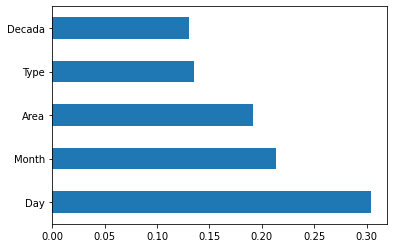

In [68]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

##**Varianza**
Se calcula la varianza de cada una de las variables y se descantan aquellas que tengan una varianza baja en comparación con las otras variables de nuestro conjunto de datos, ya que las variables con una varianza baja no afectarán a la variable objetivo.

In [69]:
ds_USA.var()

Type              0.523959
Area             84.832662
Sex               0.141590
Fatal (Y/N/U)     0.317041
Month             7.491315
Day              84.704175
Decada            3.251307
dtype: float64

#**Correlation (Pearson)**

In [70]:
import matplotlib.pyplot as plt

ds_USA.corr()

,Type,Area,Sex,Fatal (Y/N/U),Month,Day,Decada
Type,1.000000,0.023180,-0.043877,0.227358,-0.020581,-0.026645,-0.161878
Area,0.023180,1.000000,0.130148,0.025883,-0.035716,-0.000969,0.023530
Sex,-0.043877,0.130148,1.000000,-0.018404,-0.008478,0.012220,0.153908
Fatal (Y/N/U),0.227358,0.025883,-0.018404,1.000000,-0.040997,-0.011180,-0.187536
Month,-0.020581,-0.035716,-0.008478,-0.040997,1.000000,0.016937,0.074636
Day,-0.026645,-0.000969,0.012220,-0.011180,0.016937,1.000000,0.062524
Decada,-0.161878,0.023530,0.153908,-0.187536,0.074636,0.062524,1.000000


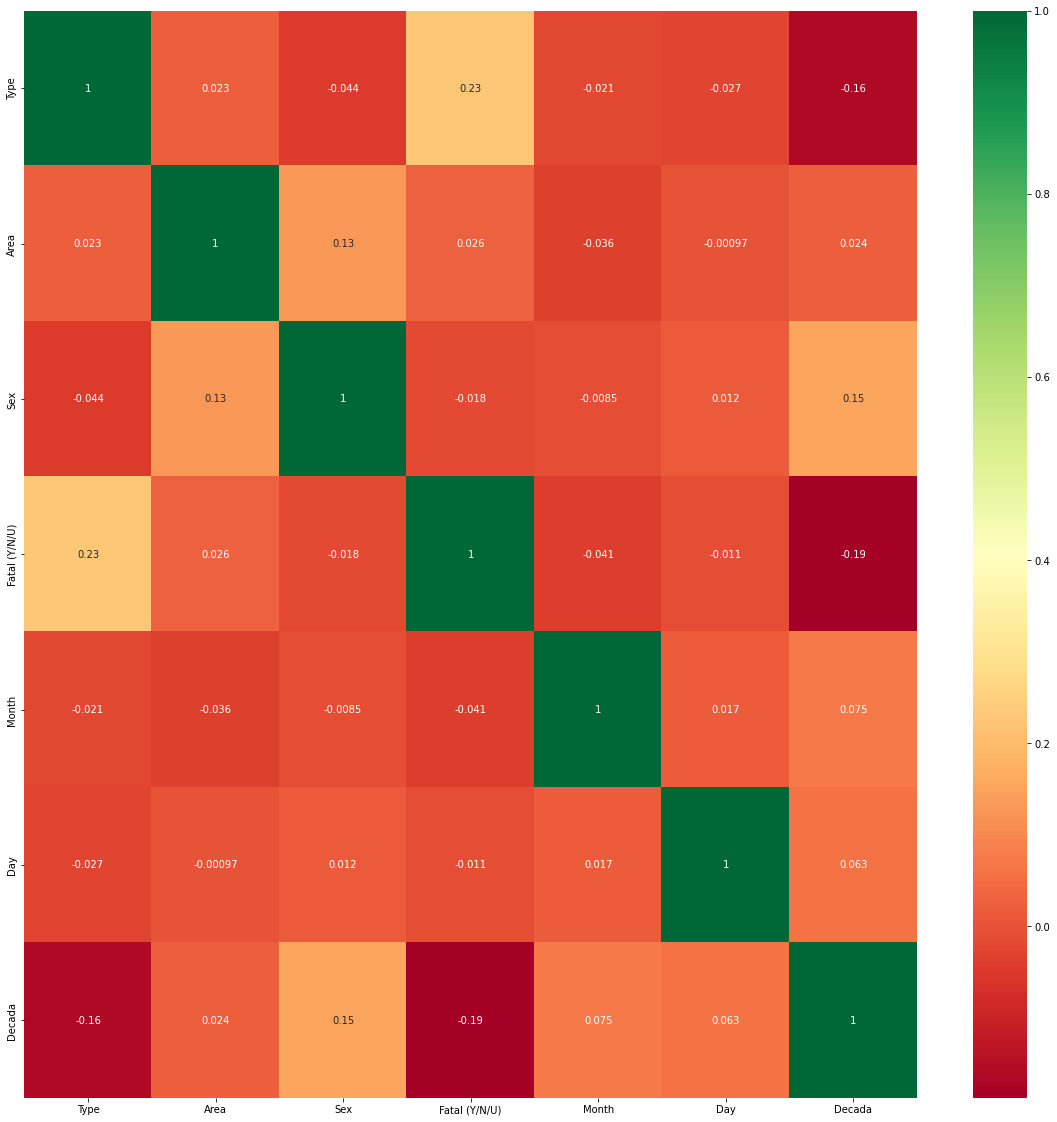

In [71]:
plt.figure(figsize=(20,20))
g=sns.heatmap(ds_USA.corr(), annot=True, cmap="RdYlGn") 

#**Backward elimination**

In [72]:
import statsmodels.api as sm

X = ds_USA 
y = ds_USA["Fatal (Y/N/U)"]          
ds_USA.head()

,Type,Area,Sex,Fatal (Y/N/U),Month,Day,Decada
0,1,5,1,0,9,18,7
1,1,5,1,0,9,18,7
2,1,5,1,0,9,18,7
6,1,5,1,0,9,11,7
7,1,9,2,0,9,7,7


In [73]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Type', 'Area', 'Fatal (Y/N/U)', 'Month', 'Day', 'Decada']


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#**PCA 1**

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [75]:
# Normalizamos los datos
scaler=StandardScaler()
df = ds_USA.drop(['Fatal (Y/N/U)'], axis=1)     # quito la variable dependiente "Y"
scaler.fit(df)  
X_scaled=scaler.transform(df)                   # Ahora si, escalo los datos y los normalizo

In [76]:
# Instanciamos PCA
pca=PCA(n_components=6)  
pca.fit(X_scaled)             # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [77]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:14]))

shape of X_pca (1688, 6)
[0.21463175 0.18547428 0.16404353 0.16246269 0.14353039 0.12985736]
suma: 1.0


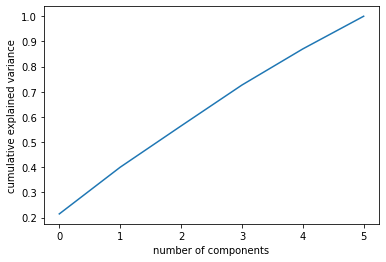

In [78]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#**PCA 2**

In [ ]:
ds_USA.keys()

Index(['Type', 'Area', 'Sex', 'Fatal (Y/N/U)', 'Month', 'Day', 'Decada'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df = ds_USA.drop(['Fatal (Y/N/U)'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df)
scaled_data=scaler.transform(df)
scaled_data


array([[-0.41342712, -0.48157784, -0.45355737,  0.72747234,  0.28356403,
         1.12330917],
       [-0.41342712, -0.48157784, -0.45355737,  0.72747234,  0.28356403,
         1.12330917],
       [-0.41342712, -0.48157784, -0.45355737,  0.72747234,  0.28356403,
         1.12330917],
       ...,
       [-0.41342712, -0.48157784, -0.45355737, -2.56174189, -1.67279598,
        -2.20520905],
       [-0.41342712, -0.80739082, -0.45355737, -0.00346415,  0.3922507 ,
        -2.20520905],
       [-0.41342712, -0.04716053, -0.45355737, -0.3689324 ,  1.0443707 ,
        -2.20520905]])

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

Text(0, 0.5, 'Second principle component')

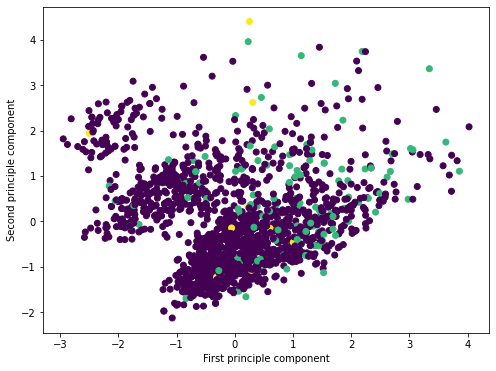

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=ds_USA['Fatal (Y/N/U)'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')